In [1]:
import numpy as np

parameters:
- n_p - number of members of party in power
- n_o - number of members of party in opposition
- n is the total
- m number of bills

In [2]:
n_p=105;
n_o=95;
n=n_p+n_o;
m=200;

bills are of 4 types:
- nonpartisan assigned with prob pr_nonpart
- partisan, policy - only party in power wants them (pr_pol is the frewuency of those, among the partisan ones)
- partisan, operational, pr_opp: both parties 
- partisan, trolling, pr_troll: only opposition wants it

In [3]:
pr_nonpart=.3;
pr_pol=.4;
pr_opp=.2;
pr_troll=1-pr_pol-pr_opp;

In [4]:
a=np.zeros([n,m]);

produce a voting record for one bill:

In [5]:
def bill(pr_p,pr_po,pr_op,pr_tr,b_p,b_o,p_sl):
    b=np.zeros([b_p+b_o]);
    if np.random.rand(1)<pr_nonpart:
        for k in range(b_p+b_o):
            b[k]=2*np.random.randint(0,2) -1;
    else:
        if np.random.rand(1)<pr_po:
            for k in np.arange(b_p):
                b[k]=2*int(np.random.binomial(1,p_sl))-1;
            for k in np.arange(b_p+1,b_p+b_o):
                b[k]=2*int(np.random.binomial(1,1-p_sl))-1;
        elif np.random.rand(1)<pr_op:
            for k in np.arange(b_p):
                b[k]=2*int(np.random.binomial(1,.7))-1;
            for k in np.arange(b_p+1,b_p+b_o):
                b[k]=2*int(np.random.binomial(1,.7))-1;
        else:
            for k in np.arange(b_p):
                b[k]=2*int(np.random.binomial(1,1-p_sl))-1;
            for k in np.arange(b_p+1,b_p+b_o):
                b[k]=2*int(np.random.binomial(1,p_sl))-1;
    return(b);

first check if it's nonpartisan: then vote for it with probability 50%

NameError: name 'b_p' is not defined

for policy bills, power party voteds with probability p_sl, opposition party woth prob 1-p_sl

SyntaxError: invalid syntax (<ipython-input-8-9237e82af029>, line 1)

for household bills, both parties vote for them with prob .7 (should be a parameter!)

else, if it's trolling bill, opposition votes for it w prob p_sl, power party 1-p_sl

In [16]:
def bill(pr_p,pr_po,pr_op,pr_tr,b_p,b_o,p_sl):
    b=np.zeros([b_p+b_o]);
    if np.random.rand(1)<pr_nonpart:
        for k in range(b_p+b_o):
            b[k]=2*np.random.randint(0,2) -1;
    else:
        if np.random.rand(1)<pr_po:
            for k in np.arange(b_p):
                b[k]=2*int(np.random.binomial(1,p_sl[k]))-1;
            for k in np.arange(b_p+1,b_p+b_o):
                b[k]=2*int(np.random.binomial(1,1-p_sl[k]))-1;
        elif np.random.rand(1)<pr_op:
            for k in np.arange(b_p):
                b[k]=2*int(np.random.binomial(1,.8))-1;
            for k in np.arange(b_p+1,b_p+b_o):
                b[k]=2*int(np.random.binomial(1,.8))-1;
        else:
            for k in np.arange(b_p):
                b[k]=2*int(np.random.binomial(1,1-p_sl[k]))-1;
            for k in np.arange(b_p+1,b_p+b_o):
                b[k]=2*int(np.random.binomial(1,p_sl[k]))-1;
    return(b);

In [11]:
p_sl = np.random.rand(n)
p_sl = (1-p_sl)*0.7 + p_sl
print(p_sl.shape)
print(p_sl)

(200,)
[0.84719916 0.76390023 0.97590009 0.9504843  0.92803787 0.89905713
 0.85065519 0.71818534 0.70250411 0.78539669 0.96641422 0.90721565
 0.80205612 0.95877741 0.8970649  0.83747622 0.76159984 0.91316121
 0.70618433 0.86553931 0.99168174 0.77020656 0.90431477 0.92449303
 0.70498193 0.73799396 0.91256781 0.92349282 0.78770082 0.8755618
 0.95554902 0.83745283 0.81293716 0.76961142 0.78264445 0.88456159
 0.98520881 0.86404787 0.71831359 0.9293166  0.87864528 0.87369901
 0.80412713 0.7473542  0.92078222 0.81662076 0.84679196 0.85650215
 0.8853723  0.92493114 0.94526693 0.81018071 0.76496074 0.77386073
 0.75591848 0.97550578 0.73940941 0.99366394 0.72837987 0.78293839
 0.76613637 0.7585937  0.88904118 0.92545427 0.86660972 0.98877156
 0.8479648  0.78805366 0.90753631 0.79089691 0.96580078 0.78296635
 0.99331843 0.92540367 0.71339453 0.78392676 0.75257421 0.95063193
 0.96649572 0.75308176 0.84204678 0.85273085 0.75632759 0.88580112
 0.78459436 0.86906872 0.99403206 0.71531277 0.99851717 

produce m bills, and do svd

In [17]:
for l in range(m):
    a[:,l]=bill(pr_nonpart,pr_pol,pr_opp,pr_troll,n_p,n_o,p_sl);
    
[u,s,v]=np.linalg.svd(a);

In [35]:
print(a.shape)

(200, 200)


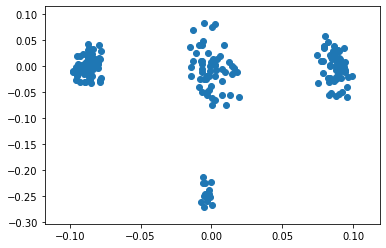

In [18]:
import matplotlib.pyplot as plt

plt.scatter(v[0,:], v[1,:])
plt.show()

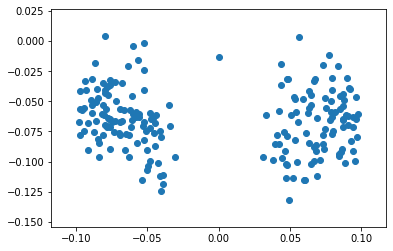

In [19]:
plt.scatter(u[:,0], u[:,1])
plt.show()